In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [15]:
import matplotlib as mpl
import pylab as plt
import numpy
import scipy
import os
import sys
import datetime as dtm
import matplotlib.dates as mpd


data_path = 'output/aqua_c192L33_10N_tstorms_output'
# then data files are like cyclones_1979, _1980, _1981
#


In [42]:
ls output/aqua_c192L33_10N_tstorms_output

cyclones_1979             cyclones_wsfc/            nml_input
cyclones_1980             job_tstorms_begun.txt     nml_traj
cyclones_1981             job_tstorms_finished.txt  tropical_storms_wsfc/


In [10]:
# data format is then like (ugh...):
# day. month. year. num_storms hour
#{then num_storms rows of}:
#. i, j, lon, lat, wind-speed (m/s), rel-vorticity (s^-1), Sea Lev. Press (Pa), "True", "True", T (C > local mean?), 10000.000
#
# so to read this thing, let's start by assuming a date. then read num_storms subsequent rows for storm data,
# then assume a new date.
#
# then output that to something like either,
# [[datetime, stuff...]]
# or
# {datetime:stuff}
# or you could do that with a nested structure,
# [datetime,[events]],
# but it would be unstructured, nonintuitive, and... stupid?
# let's just flatten the data structure and repeat the datetime.
#
# or, read through the file.
# date delimiters have 5 cols (should get a len(rw.split())==5)
#    trigger to compute date

           1           1        1979           0           6
           1           1        1979           0          12
           1           1        1979           0          18
           2           1        1979           0           0
           2           1        1979           0           6
           2           1        1979           0          12
           2           1        1979           0          18
           3           1        1979           0           0
           3           1        1979           0           6
           3           1        1979           0          12
           3           1        1979           0          18
           4           1        1979           0           0
           4           1        1979           0           6
           4           1        1979           2          12
         234         211   145.937500       15.2500000       13.4396906       2.41445072E-04   99300.4531     T T   1.37950134       10000.0000
         273         212   170.312500       15.7500000       13.0362101       8.65900147E-05   99398.2500     T T   1.49894714       10000.0000
           4           1        1979           5          18
         232         212   144.687500       15.7500000       14.6482134       3.07905255E-04   99027.4531     T T   1.54141235       10000.0000
         328         213   204.687500       16.2500000       14.2469339       2.54341721E-04   99238.4297     T T   1.36073303       10000.0000
         362         214   226.562500       15.7500000       13.4389410       2.17215595E-04   99289.6172     T T   1.11378479       10000.0000
         383         214   240.312500       16.2500000       13.4168034       2.16368862E-04   99341.2109     T T   1.02589417       10000.0000
         401         214   250.312500       15.7500000       13.6472788       2.30002363E-04   99334.2266     T T   1.03071594       10000.0000
           5           1        1979          10           0


In [33]:
this_file = os.path.join(data_path, 'cyclones_1979')
print('** this_file: ', this_file)
#
def get_ts_data(data_in):
    my_data = []
    with open(data_in) as fin:
        for rw in fin:
            rws=rw.split()
            # print(f'**[{len(rws)}]: {rws}')
            if len(rws)==5:
                day, month, year, num_storms,hr = (int(s) for s in rws)
                #print('** debug: ', day, month, year, num_storms,hr)
                #
                # some different ways to represent a date:
                ts_datetime = dtm.datetime(year,month,day,hr)
                ts_fdate = mpd.date2num(ts_datetime)
                ts_fday  = int(ts_fdate)
                continue
            #
            # otherwise, it's data!
            my_data += [tuple([ts_fday, hr] + [int(x) for x in rws[0:2]] + [float(x) for x in rws[2:7]] 
                              + [float(rws[9])])]
    #


    my_data = numpy.array( my_data, dtype=[('date', int), ('hour',int), ('j', int), ('k', int), 
                ('lon', float), ('lat', float), ('wind_speed', float), ('vort', float), 
                                          ('pressure', float), ('temp', float)])
    return my_data

** this_file:  output/aqua_c192L33_10N_tstorms_output/cyclones_1979


In [34]:
cyclones_1979 = get_ts_data(os.path.join(data_path, 'cyclones_1979'))

In [36]:
print('** ', cyclones_1979[0])
print('** ', cyclones_1979.dtype)
print('** ', cyclones_1979['hour'][0:10])

**  (3290, 12, 234, 211, 145.9375, 15.25, 13.4396906, 0.00024145, 99300.4531, 1.37950134)
**  [('date', '<i8'), ('hour', '<i8'), ('j', '<i8'), ('k', '<i8'), ('lon', '<f8'), ('lat', '<f8'), ('wind_speed', '<f8'), ('vort', '<f8'), ('pressure', '<f8'), ('temp', '<f8')]
**  [12 12 18 18 18 18 18  0  0  0]


In [37]:
for rw in cyclones_1979[0:10]:
    print('** ', rw)

**  (3290, 12, 234, 211, 145.9375, 15.25, 13.4396906, 0.00024145, 99300.4531, 1.37950134)
**  (3290, 12, 273, 212, 170.3125, 15.75, 13.0362101, 8.65900147e-05, 99398.25, 1.49894714)
**  (3290, 18, 232, 212, 144.6875, 15.75, 14.6482134, 0.00030791, 99027.4531, 1.54141235)
**  (3290, 18, 328, 213, 204.6875, 16.25, 14.2469339, 0.00025434, 99238.4297, 1.36073303)
**  (3290, 18, 362, 214, 226.5625, 15.75, 13.438941, 0.00021722, 99289.6172, 1.11378479)
**  (3290, 18, 383, 214, 240.3125, 16.25, 13.4168034, 0.00021637, 99341.2109, 1.02589417)
**  (3290, 18, 401, 214, 250.3125, 15.75, 13.6472788, 0.00023, 99334.2266, 1.03071594)
**  (3291, 0, 24, 198, 14.0625, 8.75, 7.59526825, 4.69940533e-05, 99384.1406, 1.41197205)
**  (3291, 0, 229, 212, 142.8125, 15.75, 17.0019474, 0.00053109, 98973.4766, 2.68025208)
**  (3291, 0, 251, 212, 157.1875, 16.25, 13.663846, 0.00020765, 99213.0859, 1.167099)


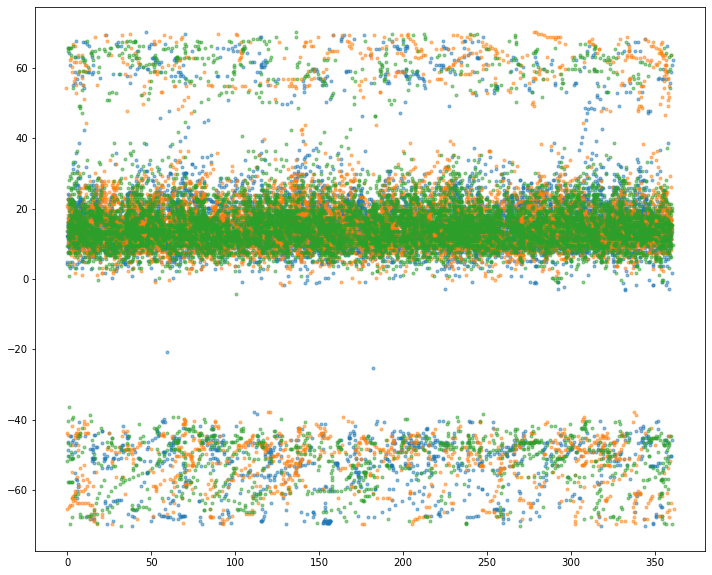

In [41]:
fg = plt.figure(figsize=(12,10))
ax = fg.add_subplot(1,1,1)
#
for yr in (1979, 1980, 1981):
    ts_data = get_ts_data(os.path.join(data_path, f'cyclones_{yr}'))
    #
    xx = ax.plot(ts_data['lon'], ts_data['lat'], marker='.', linestyle='', alpha=.5)